In [6]:
import numpy as np
import ast # for string to list 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from y2ace_funcs import *

# `pacemaker` Carbon

In [2]:
en_ase?

Signature: en_ase(r, potential_dir, potential_name)
Docstring:
Returns:
-------
Total dimer/two-body energy array as a function of distance r.
Potential is called by PyACECalculator.

Inputs:
    -------
1. r - (1,ndata) numpy array of positions. ndata is the length of the array input 
2. potential_dir - Directory where the .yaml files of the potential (output or interim) can be found. 
3. potential_name - Filename of chosen potential.
File:      /leonardo_work/Sis25_degironc_0/apol/codefiles_Convergence-of-body-orders-in-linear-ace/tools/y2ace_funcs.py
Type:      function

In [27]:
Tr1ks_all

['pacemaker/Tr1k_n/border/b_order2/',
 'pacemaker/Tr1k_n/border/b_order3/',
 'pacemaker/Tr1k_n/border/b_order4/',
 'pacemaker/Tr1k_n/45.5.4..0.2.2/',
 'pacemaker/Tr1k_n/45.8.4..0.3.3/',
 'pacemaker/Tr1k_n/45.9.5..0.6.3/',
 'pacemaker/Tr1k_n/45.8.4.3..0.3.3.2/']

In [29]:
Tr50ks

['pacemaker/Tr50k_n/45.5.4..0.2.2/',
 'pacemaker/Tr50k_n/45.8.4..0.3.3/',
 'pacemaker/Tr50k_n/45.9.5..0.6.3/',
 'pacemaker/Tr50k_n/45.8.4.3..0.3.3.2/']

In [38]:
clist

[(0.267004, 0.004874, 0.329415, 1.0),
 (0.276194, 0.190074, 0.493001, 1.0),
 (0.21621, 0.351535, 0.550627, 1.0),
 (0.15627, 0.489624, 0.557936, 1.0),
 (0.120081, 0.622161, 0.534946, 1.0),
 (0.266941, 0.748751, 0.440573, 1.0)]

In [40]:
Tr1ks_all

['pacemaker/Tr1k_n/border/b_order2/',
 'pacemaker/Tr1k_n/border/b_order3/',
 'pacemaker/Tr1k_n/border/b_order4/',
 'pacemaker/Tr1k_n/45.8.4..0.3.3/b_order4/',
 'pacemaker/Tr1k_n/45.9.5..0.6.3/b_order4/',
 'pacemaker/Tr1k_n/45.8.4.3..0.3.3.2/b_order5/']

In [39]:
len(clist), len(tr1l)

(5, 3)

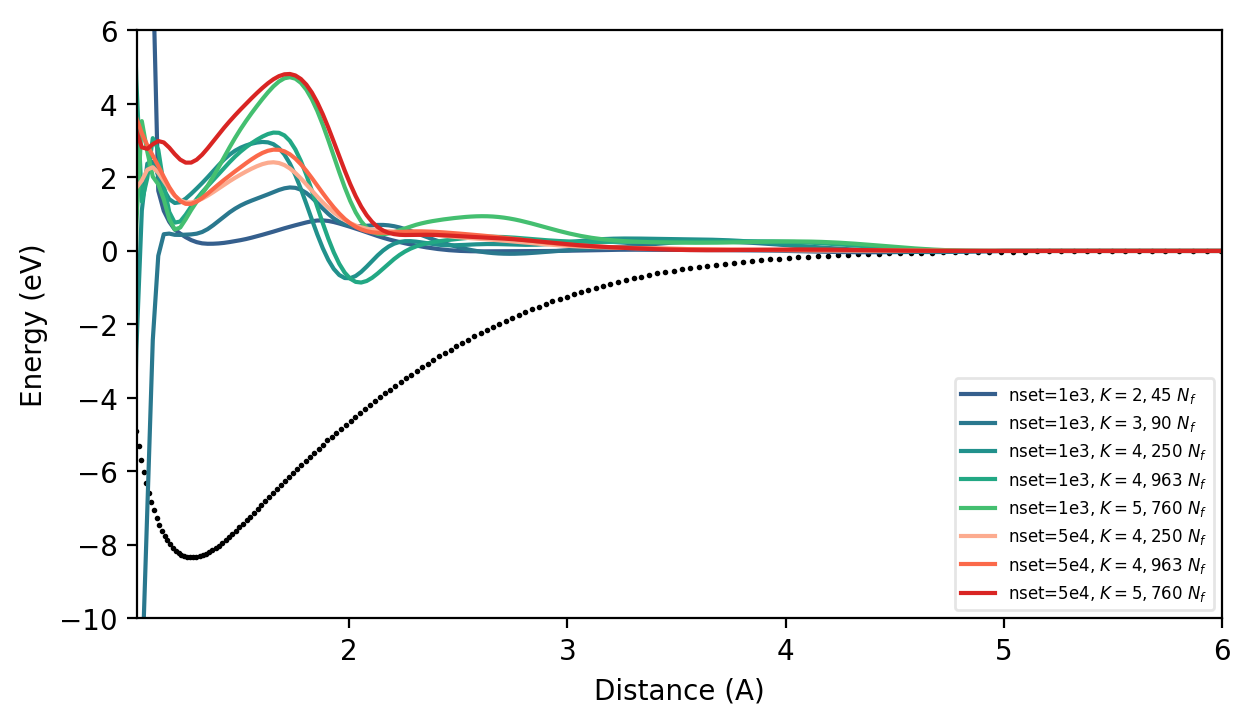

In [ ]:
## data ## 
rcut = 5.0
r = np.linspace(1,rcut+1,200)
en_qe = np.loadtxt('datasets/es01_dimer250.dat').T
en_qe[0] *= 0.529177 # bohr to Angstrom
en_qe[1] -= -18.03977639 * 2 # Subtracting the energy of two isolated atoms.
en_qe[1] *= 13.605703976 # Ry to eV

maindir = 'pacemaker'
bases = ['45.5.4..0.2.2', '45.9.5..0.6.3']
bases_clip = ['45.9.5..0.6.3']
Tr1ks_high = [maindir+'/Tr1k_n/'+b+'/b_order4/' for b in bases_clip]
Tr1ks = [maindir+'/Tr1k_n/border/b_order'+str(i)+'/' for i in range(2,5)]
Tr1ks_all = Tr1ks + Tr1ks_high + [maindir+'/Tr1k_n/45.8.4.3..0.3.3.2/b_order5/']
tr1labels = [r'$K=2, 45$ $N_f$', r'$K=3, 90$ $N_f$', r'$K=4, 250$ $N_f$', r'$K=4, 963$ $N_f$', r'$K=5, 760$ $N_f$']
tr1l = ['nset=1e3, ' + label for label in tr1labels]

# Tr1ks_all = Tr1ks + Tr1ks_high + [maindir+'/Tr1k_n/45.8.4.3..0.3.3.2/b_order5/']

Tr50ks = [maindir+'/Tr50k_n/'+b+'/b_order4/' for b in bases] + [maindir+'/Tr50k_n/45.8.4.3..0.3.3.2/b_order5/']
tr50labels = [r'$K=4, 250$ $N_f$', r'$K=4, 963$ $N_f$', r'$K=5, 760$ $N_f$']
tr50l = ['nset=5e4, ' + label for label in tr50labels]

## plot ## 
g,gax = plt.subplots(1,1,figsize=(7,3.5),dpi=200)
g.subplots_adjust(top=0.95)
gax.scatter(*en_qe,s=1,color='k')
gax.set_xlabel('Distance (A)')
gax.set_ylabel('Energy (eV)')
gax.set_xlim(1.029,rcut+1)
gax.set_ylim(-10,6)

clist = [cm.viridis(val) for val in np.linspace(0.3,0.7,len(Tr1ks_all))]
clist2 = [cm.Reds(val) for val in np.linspace(0.3,0.7,len(Tr50ks))]

for i,dir in enumerate(Tr1ks_all):
    # print(dir)
    gax.plot(r, en_ase(r, dir, 'output_potential.yaml'), color=clist[i], alpha=1, label=tr1l[i])
    # gax.plot(r, en_ase(r, dir, 'output_potential.yaml'), color=clist2[i])

for i,dir in enumerate(Tr50ks):
    gax.plot(r, en_ase(r, dir, 'interim_potential_0.yaml'), color=clist2[i], alpha=1, label=tr50l[i])
gax.legend(loc='lower right', fontsize=6, framealpha=0.5)
g.savefig('figures/dcurves_1k50k.png', dpi=200, bbox_inches='tight')

# `ACEpotentials.jl`: Carbon datasets

## ID

In [2]:
r = np.linspace(1,8,200)
en_qe = np.loadtxt('datasets/es01_dimer250.dat').T
en_qe[0] *= 0.529177 # bohr to Angstrom
en_qe[1] -= -18.03977639 * 2 # remove e1b
en_qe[1] *= 13.605703976 # Rydberg to eV

Text(0.5, 0, 'Distance (A)')

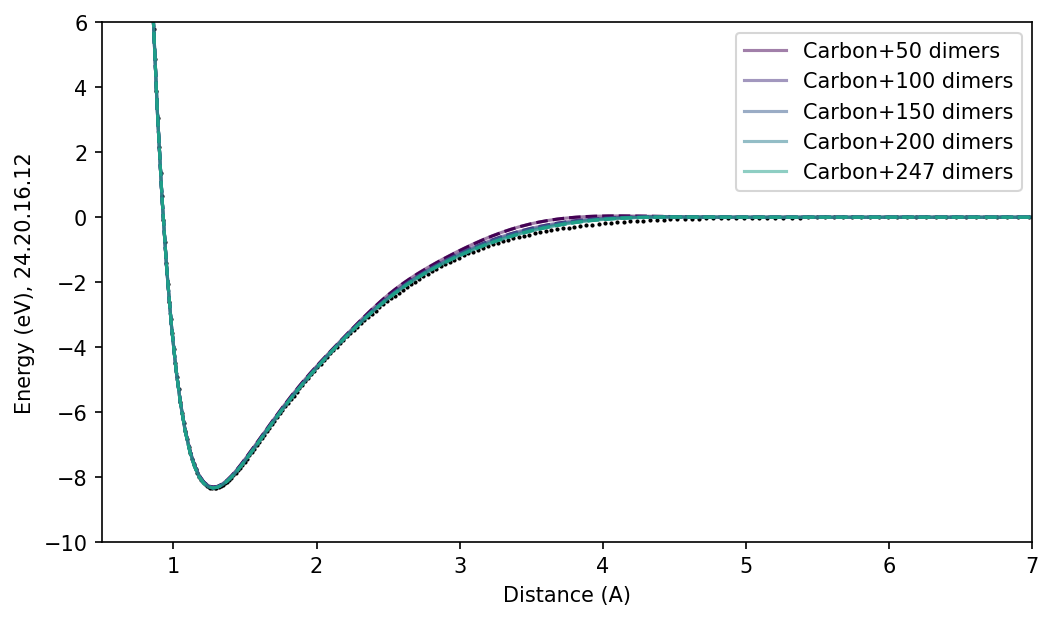

In [97]:
dsets = ['dimgen_50','dimgen_100','dimgen_150','dimgen_200','dimgen_247']
dset_labels = ['50','100','150','200','247']
jl_dims = {}
jl_puredims = {}
bases = ['24.20','24.20.16','24.20.16.12']

g, gax = plt.subplots(1, 1, figsize=(8, 4.5), dpi=150)
# g.suptitle('In-domain Carbon', fontsize=16)
for j, dset in enumerate(dsets):
    jl_dims[dset + '_' + bases[2]] = np.loadtxt(f'acejulia/{dset}/' + bases[2] + f'/ecost10.0/dimercurve.dat').T
    jl_puredims[dset + '_' + bases[2]] = np.loadtxt(f'acejulia/{dset}_purify/' + bases[2] + f'/ecost10.0/dimercurve.dat').T
    gax.plot(*jl_dims[dset + '_' + bases[2]], color=cm.viridis(0.7*j/len(dsets)), linestyle='--')
    gax.plot(*jl_puredims[dset + '_' + bases[2]], label="Carbon+"+dset_labels[j]+" dimers", color=cm.viridis(0.7*j/len(dsets)), alpha=0.5)
gax.set_ylabel('Energy (eV), ' + bases[2])
gax.set_xlim(0.5, 7)
gax.set_ylim(-10, 6)
gax.scatter(*en_qe,s=1,color='k')
gax.legend()
gax.set_xlabel('Distance (A)')

# g.savefig('figures/ind_carbon_dimer.png',dpi=300,bbox_inches='tight')

## OOD

In [119]:
bins

array([3.0000e+01, 3.7800e+02, 4.8060e+03, 1.6204e+04, 1.8410e+04,
       1.2360e+04, 5.2960e+03, 1.9180e+03, 6.5000e+02, 2.6600e+02,
       2.3800e+02, 5.2600e+02, 1.1100e+03, 2.3040e+03, 5.0840e+03,
       1.1138e+04, 2.1002e+04, 2.9184e+04, 2.9390e+04, 2.4266e+04,
       2.1028e+04, 1.9562e+04, 2.0762e+04, 2.1022e+04, 2.1084e+04,
       2.0244e+04, 1.9388e+04, 1.9546e+04, 1.9664e+04, 2.2000e+04,
       2.4276e+04, 2.7102e+04, 3.1206e+04, 3.6068e+04, 3.9754e+04,
       3.9548e+04, 3.6208e+04, 3.7002e+04, 3.5778e+04, 3.7280e+04,
       4.1990e+04, 4.4402e+04, 4.6430e+04, 4.6462e+04, 5.0956e+04,
       5.2656e+04, 5.4078e+04, 5.5442e+04, 5.7728e+04, 5.9714e+04])

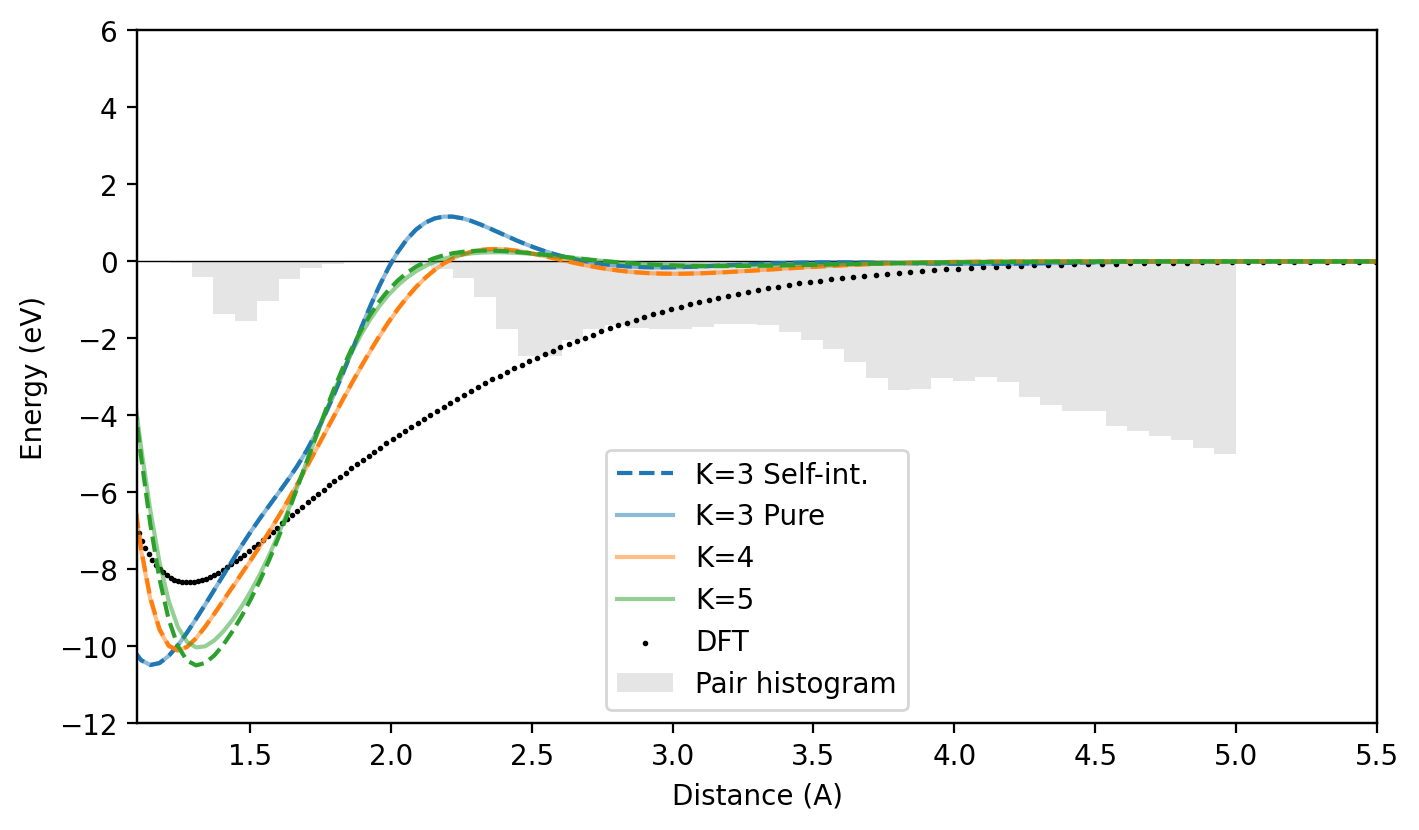

In [5]:
basis_tags = ['24.20','24.20.16','24.20.16.12']
plotlabels = ['K=3', 'K=4', 'K=5']
# dset = 'dimgen_247'
# dimgens = ['50','100','150','200','247']
dset = 'Tr1k_n'
jl_dims = {}
jl_puredims = {}
# basis_set = '24.20.16.12'

g, gax = plt.subplots(1,1,figsize=(8,4.5),dpi=200)
# g.suptitle(f'{dset}')
# g.suptitle('Out-of-distribution Carbon', fontsize=16)
# g.subplots_adjust(top=0.95)
g.subplots_adjust(wspace=0.2)

counts, bins = np.loadtxt(f'datasets/pair_distributions/{dset}_histogram.dat') # reversed
# Plot histogram as bar
gax.bar(bins, -counts*5/np.max(counts), width=bins[-1]-bins[-2], bottom=0, align='edge', alpha=0.1, color='k', label='Pair histogram')
# Add secondary y-axis for the histogram
gax_hist = gax.twinx()
gax_hist.set_ylim(-np.max(counts)*3/np.max(counts), 0)
gax_hist.set_yticks([])
gax.axhline(0, color='k', lw=0.5)

gax.set_ylabel('Energy (eV)')
gax.set_xlabel('Distance (A)')
for i,basis in enumerate(basis_tags):
    jl_dims[basis] = np.loadtxt(f'acejulia/{dset}'+'/'+basis+'/ecost10.0/dimercurve.dat').T
    jl_puredims[basis] = np.loadtxt(f'acejulia/{dset}'+'_purify/'+basis+'/ecost10.0/dimercurve.dat').T  
    if i==0:
        gax.plot(*jl_dims[basis], label=plotlabels[i]+" Self-int.", color="C"+str(i), linestyle='--')
        gax.plot(*jl_puredims[basis], label=plotlabels[i]+" Pure", color="C"+str(i), alpha=0.5)
    else:
        gax.plot(*jl_dims[basis], color="C"+str(i), linestyle='--')
        gax.plot(*jl_puredims[basis], label=plotlabels[i], color="C"+str(i), alpha=0.5)

gax.scatter(*en_qe,s=1,color='k',label=r'DFT')
gax.legend()
gax.set_xlim(1.1,5.5)
gax.set_ylim(-12,6)
g.savefig('figures/ood_carbon_dimer.png', dpi=300, bbox_inches='tight')

# `ACEpotentials.jl`: Silicon datasets

## Dataset info

In [3]:
en_si = np.loadtxt('./datasets/Si2_energy.dat').T
en_si[0,np.argmin(en_si[1])]

2.20707071

## OOD-Test (ecost50, correct r0, with pairdists)

### Coefficients

Text(0.5, 0, 'Coefficient index')

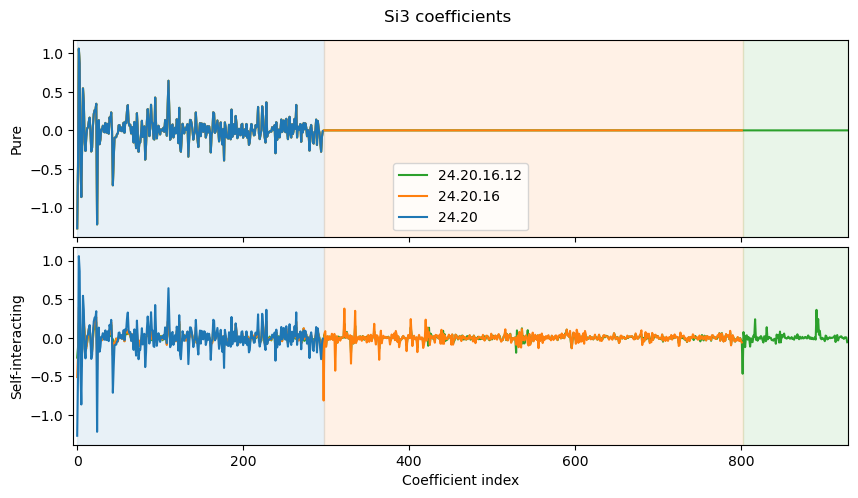

In [83]:
# Purified # 
with open('acejulia/Si_purify_OOD_coeffs_new.dat', 'r') as file:
    lines = file.readlines()
coeffs_pure = {'Si345': [], 'Si3': [], 'Si4': [], 'Si5': []}
for i, line in enumerate(lines):
    line_list = ast.literal_eval(line)
    if (i<2) | (i==8):
        coeffs_pure['Si345'].append(line_list)
    elif (i<4) | (i==9):
        coeffs_pure['Si3'].append(line_list)
    elif (i<6) | (i==10):
        coeffs_pure['Si4'].append(line_list)
    elif (i<8) | (i==11):
        coeffs_pure['Si5'].append(line_list)

# Self-interacting # 
with open('acejulia/Si_selfint_OOD_coeffs_new.dat', 'r') as file:
    lines = file.readlines()
coeffs = {'Si345': [], 'Si3': [], 'Si4': [], 'Si5': []}
for i, line in enumerate(lines):
    line_list = ast.literal_eval(line)
    if (i<2) | (i==8):
        coeffs['Si345'].append(line_list)
    elif (i<4) | (i==9):
        coeffs['Si3'].append(line_list)
    elif (i<6) | (i==10):
        coeffs['Si4'].append(line_list)
    elif (i<8) | (i==11):
        coeffs['Si5'].append(line_list)

# Checking similarity # 
dset = 'Si3'
f,ax = plt.subplots(2,1, figsize=(10,5), dpi=100, sharex=True)
f.subplots_adjust(top=0.92, hspace=0.05); f.suptitle(f'{dset} coefficients')
ax[0].set_ylabel('Pure'); ax[1].set_ylabel('Self-interacting')
ax[0].plot(coeffs_pure[dset][2], label='24.20.16.12', color='C2')
ax[0].plot(coeffs_pure[dset][1], label='24.20.16', color='C1')
ax[0].plot(coeffs_pure[dset][0], label='24.20', color='C0')
ax[1].plot(coeffs[dset][2], label='24.20.16.12', color='C2')
ax[1].plot(coeffs[dset][1], label='24.20.16', color='C1')
ax[1].plot(coeffs[dset][0], label='24.20', color='C0')
for axes in ax:
    axes.axvspan(0, 297, color='C0', alpha=0.1)
    axes.axvspan(297, 802, color='C1', alpha=0.1)
    axes.axvspan(802, 929, color='C2', alpha=0.1)
    axes.set_xlim(-5,929)
    # axes.set_xlim(24,297)
    # axes.set_ylim(-5,5)
ax[0].legend()
ax[1].set_xlabel('Coefficient index')
# f.savefig(f'figures/{dset}_coeffs.png', dpi=300, bbox_inches='tight')

### Errors

#### Data load

In [4]:
# MAE # 
errs = {}
errs['train'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}
errs['val'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}

errs['train']['Si2'] = [0.0003295037669613521,0.00032950376699773185,0.00032950376699773185]
errs['train']['Si3'] = [7.514078691201576e-5,8.342407291820563e-5,9.917514633343671e-5]
errs['train']['Si4'] = [0.003085885978980514,1.686203177087009e-11,2.4465407477691768e-11]
errs['train']['Si5'] = [0.04418621288175018,0.019650559042183886,0.019875246442239584]

errs['val']['Si2'] = [2.6798167614910544,2.679816761618633,2.679816761876522]
errs['val']['Si3'] = [3.804971636814831,3.804971636814831,19.1013800390616]
errs['val']['Si4'] = [1.8509284013997713,3.1560994092361545,4.812692631112139]
errs['val']['Si5'] = [0.04418621288175018,0.019650559042183886,0.019875246442239584]

errs_pure = {}
errs_pure['train'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}
errs_pure['val'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}

errs_pure['train']['Si2'] = [0.0003295037669613521,0.00032950376699773185,0.00032950376699773185]
errs_pure['train']['Si3'] = [7.514078691201576e-5,7.514078626627452e-5,7.51407866300724e-5]
errs_pure['train']['Si4'] = [0.0030858859785439564,7.521521183662116e-12,7.60337570682168e-12]
errs_pure['train']['Si5'] = [0.04418621288172835,0.017363908397961494,0.016300175236996436]

errs_pure['val']['Si2'] = [2.679816761510956,2.6798167614772663,2.679816761503127]
errs_pure['val']['Si3'] = [3.8049718130040167,3.8049716552447026,3.8049717081717573]
errs_pure['val']['Si4'] = [1.8509284013241813,2.49272505951872,2.490267071497841]
errs_pure['val']['Si5'] = [0.04418621288172835,0.017363908397961494,0.016300175236996436]

# MAE # 
ferrs = {}
ferrs['train'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}
ferrs['val'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}

ferrs['train']['Si2'] = [0.014631883962682973,0.014631883959668676,0.014631883959668676]
ferrs['train']['Si3'] = [0.02571718896575403,0.02464874843622091,0.02548843020945877]
ferrs['train']['Si4'] = [1.0782276506088444,0.2888260281035634,0.31531139411432735]
ferrs['train']['Si5'] = [0.5290207263058506,0.35292831700352423,0.338201333823165]

ferrs['val']['Si2'] = [1.666714735904054,1.6667147358113914,1.6667147357871739]
ferrs['val']['Si3'] = [2.858206490306253,4.299827323724238,11.106770035297926]
ferrs['val']['Si4'] = [2.0021428579379537,1.2547983469787605,1.987820565434771]
ferrs['val']['Si5'] = [0.5290207263058506,0.35292831700352423,0.338201333823165]

ferrs_pure = {}
ferrs_pure['train'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}
ferrs_pure['val'] = {'Si2': [], 'Si3': [], 'Si4': [], 'Si5': []}

ferrs_pure['train']['Si2'] = [0.014631883962682973,0.014631883959668676,0.014631883959668676]
ferrs_pure['train']['Si3'] = [0.02571718896575403,0.02464874843622091,0.025717188864445368]
ferrs_pure['train']['Si4'] = [1.078227650673339,0.40436444164669233,0.4045728182164105]
ferrs_pure['train']['Si5'] = [0.529020726305921,0.36860574672054114,0.3680422260269243]

ferrs_pure['val']['Si2'] = [1.666714735900488,1.6667147359008967,1.6667147359080952]
ferrs_pure['val']['Si3'] = [2.8582065019775955,2.8582063833692737,2.858206563146323]
ferrs_pure['val']['Si4'] = [2.0021428580827516,1.5841059539832745,1.5796121032057044]
ferrs_pure['val']['Si5'] = [0.529020726305921,0.36860574672054114,0.3680422260269243]

#### MAE vs. dataset 

In [6]:
en_err_pure

{'Si2': [2.679816761510956, 2.6798167614772663, 2.679816761503127],
 'Si3': [3.8049718130040167, 3.8049716552447026, 3.8049717081717573],
 'Si4': [1.8509284013241813, 2.49272505951872, 2.490267071497841],
 'Si5': [0.04418621288172835, 0.017363908397961494, 0.016300175236996436]}

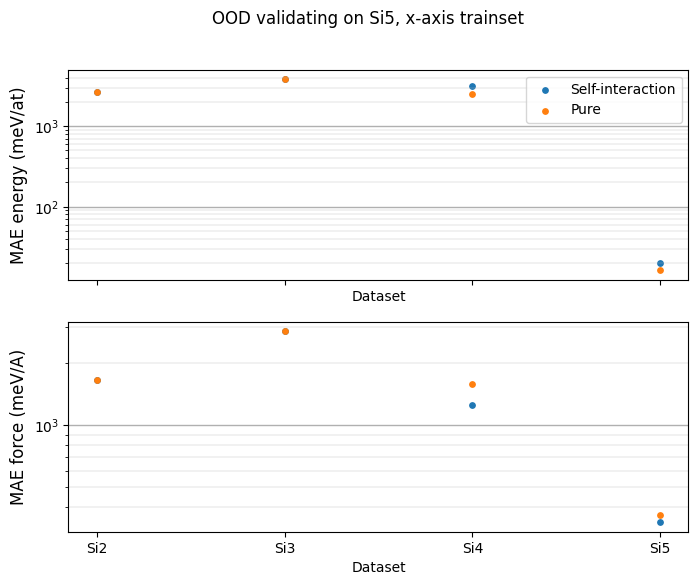

In [5]:
## SIEVING DATA ## 
en_err = errs['val']
en_err_pure = errs_pure['val']
ferrs_err = ferrs['val']
ferrs_err_pure = ferrs_pure['val']
yerr = np.array([en_err['Si2'][0], en_err['Si3'][0], en_err['Si4'][1], en_err['Si5'][2]])
yerr_pure = np.array([en_err_pure['Si2'][0], en_err_pure['Si3'][0], en_err_pure['Si4'][1], en_err_pure['Si5'][2]])
yerr_ferrs = np.array([ferrs_err['Si2'][0], ferrs_err['Si3'][0], ferrs_err['Si4'][1], ferrs_err['Si5'][2]])
yerr_ferrs_pure = np.array([ferrs_err_pure['Si2'][0], ferrs_err_pure['Si3'][0], ferrs_err_pure['Si4'][1], ferrs_err_pure['Si5'][2]])

## PLOT ## 
x = [2, 3, 4, 5]
xticks = ['Si2', 'Si3', 'Si4', 'Si5']
f,ax = plt.subplots(2,1, figsize=(8,6), dpi=100, sharex=True)
f.suptitle('OOD validating on Si5, x-axis trainset')
ax[0].scatter(x, yerr*1e3, s=15, color='C0', label='Self-interaction')
ax[0].scatter(x, yerr_pure*1e3, s=15, color='C1', label='Pure')
ax[0].set_ylabel('MAE energy (meV/at)', fontsize=12)
ax[0].set_xticks(x)
ax[0].set_xticklabels(xticks)
ax[0].legend()

ax[1].scatter(x, yerr_ferrs*1e3, s=15, color='C0', label='Self-interaction')
ax[1].scatter(x, yerr_ferrs_pure*1e3, s=15, color='C1', label='Pure')
ax[1].set_ylabel('MAE force (meV/A)', fontsize=12)
ax[1].set_xticks(x)
ax[1].set_xticklabels(xticks)

for axes in ax:
    axes.set_xlabel('Dataset')
    axes.grid(axis='y', which='major', linewidth=1)
    axes.grid(axis='y', which='minor', linewidth=0.25)
    axes.set_yscale('log')

#### MAE vs. basis set for diff datasets 

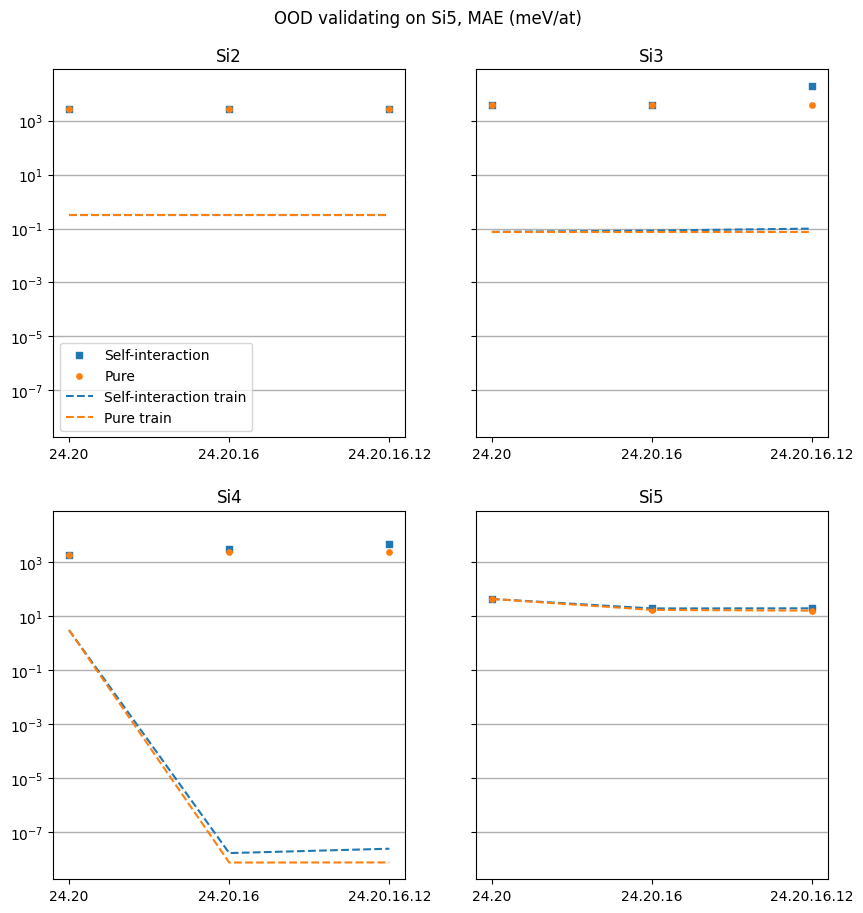

In [86]:
## SIEVING DATA ## 
tr_en_err = errs['train']
tr_en_err_pure = errs_pure['train']
tr_ferrs_err = ferrs['train']
tr_ferrs_err_pure = ferrs_pure['train']

en_err = errs['val']
en_err_pure = errs_pure['val']
ferrs_err = ferrs['val']
ferrs_err_pure = ferrs_pure['val']
# structure is (trainset, basis)
tr_en_err_matrix = np.row_stack([tr_en_err[key] for key in tr_en_err.keys()])
tr_en_err_pure_matrix = np.row_stack([tr_en_err_pure[key] for key in tr_en_err_pure.keys()])
tr_ferrs_err_matrix = np.row_stack([tr_ferrs_err[key] for key in tr_ferrs_err.keys()])
tr_ferrs_err_pure_matrix = np.row_stack([tr_ferrs_err_pure[key] for key in tr_ferrs_err_pure.keys()])

en_err_matrix = np.row_stack([en_err[key] for key in en_err.keys()])
en_err_pure_matrix = np.row_stack([en_err_pure[key] for key in en_err_pure.keys()])
ferrs_err_matrix = np.row_stack([ferrs_err[key] for key in ferrs_err.keys()])
ferrs_err_pure_matrix = np.row_stack([ferrs_err_pure[key] for key in ferrs_err_pure.keys()])


## PLOT ## 
x = [3, 4, 5]
xticks = ['24.20', '24.20.16', '24.20.16.12']
f,ax = plt.subplots(2,2, figsize=(10,10), dpi=100, sharey=True)
f.suptitle('OOD validating on Si5, MAE (meV/at)')
f.subplots_adjust(top=0.92)
trainsets = ['Si2', 'Si3', 'Si4', 'Si5']
for i,axes in enumerate(ax.flatten()):
    axes.set_title(trainsets[i])
    axes.set_xticks(x)
    axes.set_xticklabels(xticks)
    axes.scatter(x, en_err_matrix[i,:]*1e3, s=15, color='C0', marker='s', label='Self-interaction')
    axes.scatter(x, en_err_pure_matrix[i,:]*1e3, s=15, color='C1', label='Pure')
    axes.plot(x, tr_en_err_matrix[i,:]*1e3, color='C0', linestyle='--', label='Self-interaction train')
    axes.plot(x, tr_en_err_pure_matrix[i,:]*1e3, color='C1', linestyle='--', label='Pure train')

    # axes.set_xlabel('Basis-set')
    # axes.set_ylabel('MAE energy (meV/at)', fontsize=12)
    axes.grid(axis='y', which='major', linewidth=1)
    axes.grid(axis='y', which='minor', linewidth=0.25)
    axes.set_yscale('log')
ax.flatten()[0].legend(loc='lower left')

### Dimers

In [5]:
# Purified # 
with open('acejulia/Si_purify_OOD_trvalsplit_coeffs.dat', 'r') as file:
    lines = file.readlines()
coeffs_pure = {'Si345': [], 'Si3': [], 'Si4': [], 'Si5': []}
for i, line in enumerate(lines):
    line_list = ast.literal_eval(line)
    if (i<2) | (i==8):
        coeffs_pure['Si345'].append(line_list)
    elif (i<4) | (i==9):
        coeffs_pure['Si3'].append(line_list)
    elif (i<6) | (i==10):
        coeffs_pure['Si4'].append(line_list)
    elif (i<8) | (i==11):
        coeffs_pure['Si5'].append(line_list)

# Self-interacting # 
with open('acejulia/Si_selfint_OOD_trvalsplit_coeffs.dat', 'r') as file:
    lines = file.readlines()
coeffs = {'Si345': [], 'Si3': [], 'Si4': [], 'Si5': []}
for i, line in enumerate(lines):
    line_list = ast.literal_eval(line)
    if (i<2) | (i==8):
        coeffs['Si345'].append(line_list)
    elif (i<4) | (i==9):
        coeffs['Si3'].append(line_list)
    elif (i<6) | (i==10):
        coeffs['Si4'].append(line_list)
    elif (i<8) | (i==11):
        coeffs['Si5'].append(line_list)

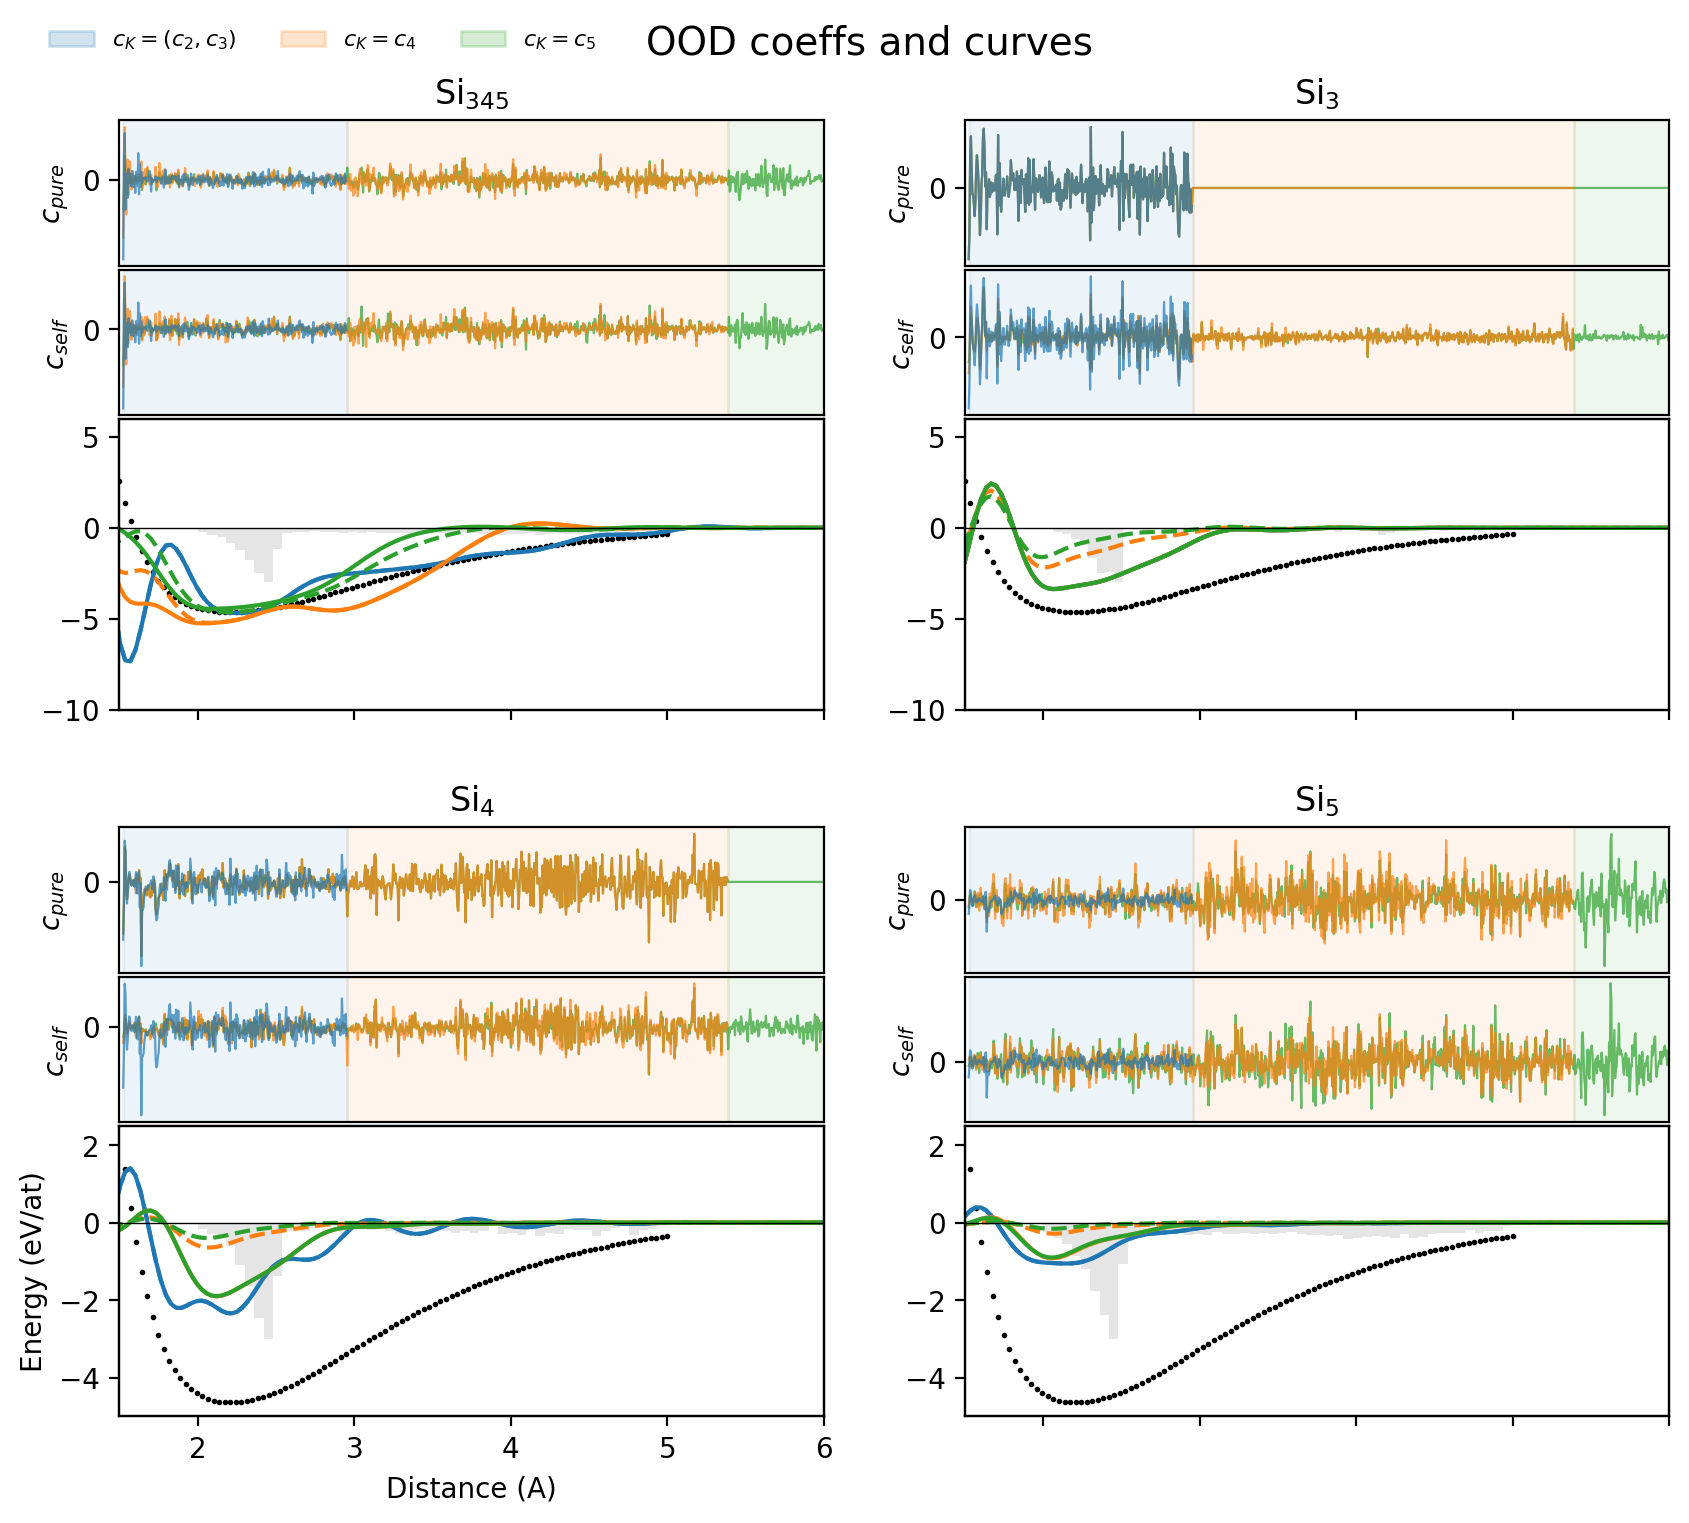

In [18]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

en_si = np.loadtxt('./datasets/Si2_energy.dat').T

# Purified # 
with open('acejulia/Si_purify_OOD_trvalsplit_coeffs.dat', 'r') as file:
    lines = file.readlines()
coeffs_pure = {'Si345': [], 'Si3': [], 'Si4': [], 'Si5': []}
for i, line in enumerate(lines):
    line_list = ast.literal_eval(line)
    if i<3:
        coeffs_pure['Si345'].append(line_list)
    elif i<6:
        coeffs_pure['Si3'].append(line_list)
    elif i<9:
        coeffs_pure['Si4'].append(line_list)
    else:
        coeffs_pure['Si5'].append(line_list)

# Self-interacting # 
with open('acejulia/Si_selfint_OOD_trvalsplit_coeffs.dat', 'r') as file:
    lines = file.readlines()
coeffs = {'Si345': [], 'Si3': [], 'Si4': [], 'Si5': []}
for i, line in enumerate(lines):
    line_list = ast.literal_eval(line)
    if i<3:
        coeffs['Si345'].append(line_list)
    elif i<6:
        coeffs['Si3'].append(line_list)
    elif i<9:
        coeffs['Si4'].append(line_list)
    else:
        coeffs['Si5'].append(line_list)

#     line_list = ast.literal_eval(line)
#     if (i<2) | (i==8):
#         coeffs_pure['Si345'].append(line_list)
#     elif (i<4) | (i==9):
#         coeffs_pure['Si3'].append(line_list)
#     elif (i<6) | (i==10):
#         coeffs_pure['Si4'].append(line_list)
#     elif (i<8) | (i==11):
#         coeffs_pure['Si5'].append(line_list)

# # Self-interacting # 
# with open('acejulia/Si_selfint_OOD_trvalsplit_coeffs.dat', 'r') as file:
#     lines = file.readlines()
# coeffs = {'Si345': [], 'Si3': [], 'Si4': [], 'Si5': []}
# for i, line in enumerate(lines):
#     line_list = ast.literal_eval(line)
#     if (i<2) | (i==8):
#         coeffs['Si345'].append(line_list)
#     elif (i<4) | (i==9):
#         coeffs['Si3'].append(line_list)
#     elif (i<6) | (i==10):
#         coeffs['Si4'].append(line_list)
#     elif (i<8) | (i==11):
#         coeffs['Si5'].append(line_list)

g,gax = plt.subplots(2,2, figsize=(10,8), dpi=200)
g.suptitle(r'OOD coeffs and curves', fontsize=14)
g.subplots_adjust(top=0.92, hspace=0.2)
basis_tags = ['24.20', '24.20.16', '24.20.16.12']
ecost = 50.0
# dsets = ['Si2', 'Si3', 'Si4', 'Si5']
dsetlabels = [r'Si$_{345}$', r'Si$_3$', r'Si$_4$', r'Si$_5$']
dsets = [r'Si345', r'Si3', r'Si4', r'Si5']
Si_pure = {}
Si_selfint = {}

axes_flat = gax.flatten()
for i, dset in enumerate(dsets):
    axes_flat[i].set_title(f'{dsetlabels[i]}')
    axes_flat[i].set_ylim(-10,10)
    axes_flat[i].set_xlim(np.min(en_si[0]),6)
    axes_flat[i].scatter(*en_si, s=1, color='k')
    axes_flat[i].axhline(0, color='k', lw=0.5)
    axes_flat[i].set_title(dset)
    # Split each quadrant into two subplots: top for coefficients, bottom for dimer curve
    inner_gs = axes_flat[i].get_subplotspec().subgridspec(3, 1, height_ratios=[1, 1, 2], hspace=0.02)
    coeff_axp = g.add_subplot(inner_gs[0])
    coeff_axp.set_title(dsetlabels[i])
    coeff_axsi = g.add_subplot(inner_gs[1])
    dimer_ax = g.add_subplot(inner_gs[2], sharex=axes_flat[i])
    bins, counts = np.loadtxt(f'datasets/pair_distributions/{dset}_histogram.dat').T
    # Plot histogram as bar
    dimer_ax.bar(bins, -counts*3/np.max(counts), width=bins[-1]-bins[-2], bottom=0, align='edge', alpha=0.1, color='k', label='Pair histogram')
    # Add secondary y-axis for the histogram
    ax_hist = dimer_ax.twinx()
    # ax_hist.set_ylabel('Pair distribution', fontsize=10)
    ax_hist.set_ylim(-np.max(counts)*3/np.max(counts), 0)
    ax_hist.set_yticks([])

    # Hide the original axes_flat[i]
    axes_flat[i].set_visible(False)

    # Plot coefficients (pure and self-interacting)
    for j, color in enumerate(['C2', 'C1', 'C0']):
        coeff_axp.plot(coeffs_pure[dset][2-j], color=color, lw=0.8, alpha=0.7)
        coeff_axsi.plot(coeffs[dset][2-j], color=color, lw=0.8, alpha=0.7)
    for axes in [coeff_axp, coeff_axsi]:
        axes.axvspan(0, 297, color='C0', alpha=0.08)
        axes.axvspan(297, 802, color='C1', alpha=0.08)
        axes.axvspan(802, 929, color='C2', alpha=0.08)
        axes.set_xlim(-5,929)

    coeff_axp.set_ylabel(r"$c_{pure}$"); coeff_axsi.set_ylabel(r"$c_{self}$")
    for axes in [coeff_axp, coeff_axsi]:
        axes.set_xticks([])
        axes.set_yticks([0])

    # Plot dimer curves
    for j, basis in enumerate(basis_tags):
        # Load  
        Si_pure[dset+'_'+basis] = np.loadtxt(f'acejulia/{dset}_purify/' + basis + f'/ecost{ecost}/dimercurve.dat').T
        Si_selfint[dset+'_'+basis] = np.loadtxt(f'acejulia/{dset}/' + basis + f'/ecost{ecost}/dimercurve.dat').T
        dimer_ax.plot(*Si_pure[dset+'_'+basis], label=basis+' pure', color='C'+str(j))
        dimer_ax.plot(*Si_selfint[dset+'_'+basis], label=basis+' selfint', color='C'+str(j), linestyle='--')
    dimer_ax.scatter(*en_si, s=1, color='k')
    dimer_ax.axhline(0, color='k', lw=0.5)
    dimer_ax.set_ylim(-10, 6)
    dimer_ax.set_xlim(np.min(en_si[0]), 6)
    
    if i == 2:
        dimer_ax.set_ylabel('Energy (eV/at)', fontsize=10)
        dimer_ax.set_xlabel('Distance (A)', fontsize=10)
    else:
        dimer_ax.set_xticklabels([])
    # if i == 0:
    #     dimer_ax.legend(fontsize=8, loc='upper right')
# axes_flat[1].legend(fontsize=8, loc='upper right')
    if i > 1:
        dimer_ax.set_ylim(-5,2.5)
axes_flat[2].set_ylabel('Energy (eV/at)', fontsize=10)
axes_flat[2].set_xlabel('Distance (A)', fontsize=10)
import matplotlib.patches as mpatches

# Create custom legend patches for the color bar
patch_3body = mpatches.Patch(color='C0', alpha=0.2, label=r'$c_K=(c_2,c_3)$')
patch_4body = mpatches.Patch(color='C1', alpha=0.2, label=r'$c_K=c_4$')
patch_5body = mpatches.Patch(color='C2', alpha=0.2, label=r'$c_K=c_5$')

# Place the color bar legend in a suitable location (e.g., below all subplots)
g.legend(handles=[patch_3body, patch_4body, patch_5body], loc='upper left', ncol=3, bbox_to_anchor=(0.08, 0.99), fontsize=8, frameon=False)
g.savefig('figures/ood_silicon_dimer.png', dpi=300, bbox_inches='tight')



## In-domain Test

### Coefficients

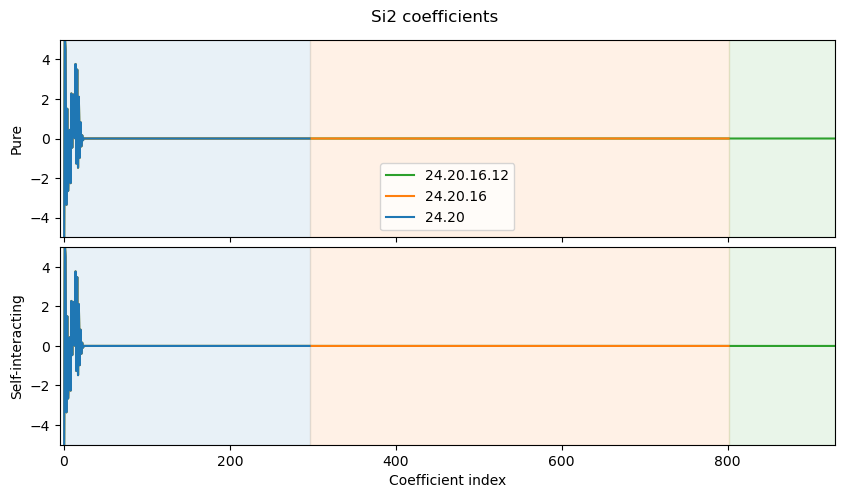

In [151]:
# Purified # 
with open('acejulia/Si_purify_inD_coeffs.dat', 'r') as file:
    lines = file.readlines()
coeffs_pure = {'Si2': [], 'Si23': [], 'Si234': [], 'Si2345': []}
for i, line in enumerate(lines):
    line_list = ast.literal_eval(line)
    if i<3:
        coeffs_pure['Si2'].append(line_list)
    elif i<6:
        coeffs_pure['Si23'].append(line_list)
    elif i<9:
        coeffs_pure['Si234'].append(line_list)
    else:
        coeffs_pure['Si2345'].append(line_list)

# Self-interacting # 
with open('acejulia/Si_selfint_inD_coeffs.dat', 'r') as file:
    lines = file.readlines()
coeffs = {'Si2': [], 'Si23': [], 'Si234': [], 'Si2345': []}
for i, line in enumerate(lines):
    line_list = ast.literal_eval(line)
    if i<3:
        coeffs['Si2'].append(line_list)
    elif i<6:
        coeffs['Si23'].append(line_list)
    elif i<9:
        coeffs['Si234'].append(line_list)
    else:
        coeffs['Si2345'].append(line_list)

# Checking similarity # 
dset = 'Si2'
f,ax = plt.subplots(2,1, figsize=(10,5), dpi=100, sharex=True)
f.subplots_adjust(top=0.92, hspace=0.05); f.suptitle(f'{dset} coefficients')
ax[0].set_ylabel('Pure'); ax[1].set_ylabel('Self-interacting')
ax[0].plot(coeffs_pure[dset][2], label='24.20.16.12', color='C2')
ax[0].plot(coeffs_pure[dset][1], label='24.20.16', color='C1')
ax[0].plot(coeffs_pure[dset][0], label='24.20', color='C0')
ax[1].plot(coeffs[dset][2], label='24.20.16.12', color='C2')
ax[1].plot(coeffs[dset][1], label='24.20.16', color='C1')
ax[1].plot(coeffs[dset][0], label='24.20', color='C0')
for axes in ax:
    axes.axvspan(0, 297, color='C0', alpha=0.1)
    axes.axvspan(297, 802, color='C1', alpha=0.1)
    axes.axvspan(802, 929, color='C2', alpha=0.1)
    axes.set_xlim(-5,929); axes.set_ylim(-5,5)
ax[0].legend()
ax[1].set_xlabel('Coefficient index')
f.savefig(f'figures/{dset}_coeffs.png', dpi=300, bbox_inches='tight')

### Errors

#### Data load

In [73]:
# MAE # 
errs = {}
errs['train'] = {'Si23': [], 'Si234': [], 'Si2345': []}
errs['val'] = {'Si23': [], 'Si234': [], 'Si2345': []}
errs['train']['Si23'] = [0.0003189446304213561, 0.00031510721108588766, 0.00031473502299377286]
errs['train']['Si234'] = [0.012823928401797578, 0.00030467564776699875,  0.00030326815984153653]
errs['train']['Si2345'] = [0.06283192872027485, 0.011172733801797676, 0.006813574792344071]

errs['val']['Si23'] = [0.7314496303867745, 2.145457214576374, 5.201990817811364]
errs['val']['Si234'] = [0.5542576591895013, 0.6402825581082853,  0.5059191758755059]
errs['val']['Si2345'] = [0.04646340991892066, 0.011582635910943282, 0.009026467482877706]


errs_pure = {}
errs_pure['train'] = {'Si23': [], 'Si234': [], 'Si2345': []}
errs_pure['val'] = {'Si23': [], 'Si234': [], 'Si2345': []}
errs_pure['train']['Si23'] = [0.0003189446304213561, 0.00031510721108588766, 0.0003147350223389367]
errs_pure['train']['Si234'] = [0.012823928401797578, 0.00030467564776699875, 0.0003032681587076998]
errs_pure['train']['Si2345'] = [0.06283192872027485, 0.011172733801797676, 0.006813574802081348]

errs_pure['val']['Si23'] = [0.7314493916057563, 0.7314494996472295, 0.7314496311553558]
errs_pure['val']['Si234'] = [0.5542576591918005, 0.7598177556880328, 0.7598177346910779]
errs_pure['val']['Si2345'] = [0.046463409918951586, 0.01156226949635493, 0.008962682054469042]

# MAE # 
ferrs = {}
ferrs['train'] = {'Si23': [], 'Si234': [], 'Si2345': []}
ferrs['val'] = {'Si23': [], 'Si234': [], 'Si2345': []}
ferrs['train']['Si23'] = [0.010347197346083458, 0.010224281927640713, 0.010215513230177633]
ferrs['train']['Si234'] = [0.268123466231014, 0.01735149742814704, 0.017074917681626868]
ferrs['train']['Si2345'] = [0.4434120400086316, 0.27871369480902275, 0.23009000284029432]

ferrs['val']['Si23'] = [5.202882369477908, 8.785332757678953, 10.867899320684742]
ferrs['val']['Si234'] = [1.1525539959336513, 2.9861313822092117, 3.941926090041813]
ferrs['val']['Si2345'] = [0.4900724250143046, 0.309479880769104, 0.27748206529634856]


ferrs_pure = {}
ferrs_pure['train'] = {'Si23': [], 'Si234': [], 'Si2345': []}
ferrs_pure['val'] = {'Si23': [], 'Si234': [], 'Si2345': []}
ferrs_pure['train']['Si23'] = [0.010347197342848648, 0.01034719733562278, 0.010347197346557126]
ferrs_pure['train']['Si234'] = [0.26812346623277344, 0.017291320690499955, 0.017291320687248105]
ferrs_pure['train']['Si2345'] = [0.4434120400091624, 0.27869627411419673, 0.22856815917391504]

ferrs_pure['val']['Si23'] = [5.202882206225266, 5.202882370789215, 5.202882452351486]
ferrs_pure['val']['Si234'] = [1.1525539959956859, 3.628515785410515, 3.628515824311212]
ferrs_pure['val']['Si2345'] = [0.490072425014623, 0.30930696936371477, 0.2761654992913551]

#### MAE vs. dataset

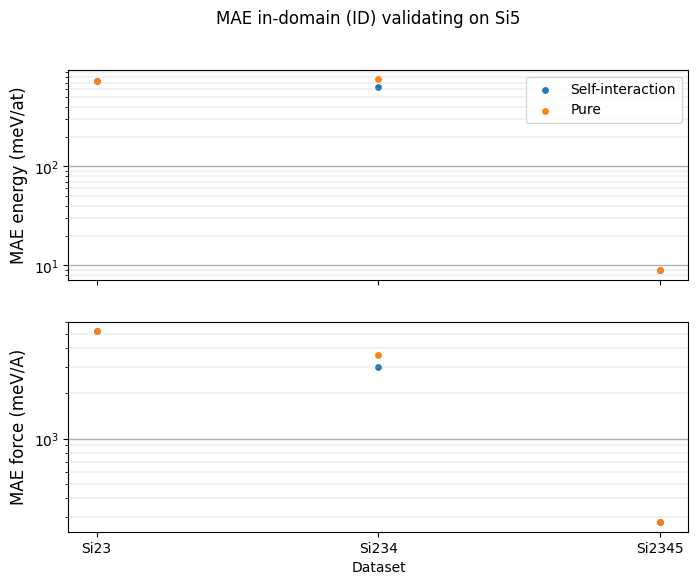

In [76]:
## SIEVING DATA ## 
en_err = errs['val']
en_err_pure = errs_pure['val']
ferrs_err = ferrs['val']
ferrs_err_pure = ferrs_pure['val']
yerr = np.array([en_err['Si23'][0], en_err['Si234'][1], en_err['Si2345'][2]])
yerr_pure = np.array([en_err_pure['Si23'][0], en_err_pure['Si234'][1], en_err_pure['Si2345'][2]])
yerr_ferrs = np.array([ferrs_err['Si23'][0], ferrs_err['Si234'][1], ferrs_err['Si2345'][2]])
yerr_ferrs_pure = np.array([ferrs_err_pure['Si23'][0], ferrs_err_pure['Si234'][1], ferrs_err_pure['Si2345'][2]])


## PLOT ## 
x = [3, 4, 5]
xticks = ['Si23', 'Si234', 'Si2345']
f,ax = plt.subplots(2,1, figsize=(8,6), dpi=100, sharex=True)
f.suptitle('MAE in-domain (ID) validating on Si5')
ax[0].scatter(x, yerr*1e3, s=15, color='C0', label='Self-interaction')
ax[0].scatter(x, yerr_pure*1e3, s=15, color='C1', label='Pure')
ax[0].set_ylabel('MAE energy (meV/at)', fontsize=12)
ax[0].set_xticks(x)
ax[0].set_xticklabels(xticks)
ax[0].legend()

ax[1].scatter(x, yerr_ferrs*1e3, s=15, color='C0', label='Self-interaction')
ax[1].scatter(x, yerr_ferrs_pure*1e3, s=15, color='C1', label='Pure')
ax[1].set_ylabel('MAE force (meV/A)', fontsize=12)
ax[1].set_xticks(x)
ax[1].set_xticklabels(xticks)
ax[1].set_xlabel('Dataset')
for axes in ax:
    axes.grid(axis='y', which='major', linewidth=1)
    axes.grid(axis='y', which='minor', linewidth=0.25)
    axes.set_yscale('log')

#### MAE vs. basis set for diff datasets

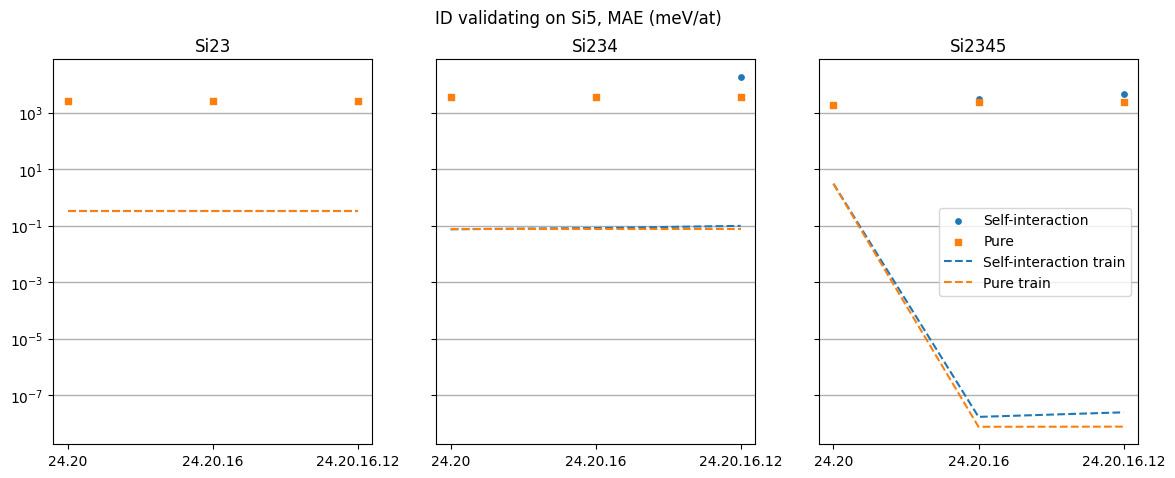

In [39]:
## SIEVING DATA ## 
tr_en_err = errs['train']
tr_en_err_pure = errs_pure['train']
tr_ferrs_err = ferrs['train']
tr_ferrs_err_pure = ferrs_pure['train']

en_err = errs['val']
en_err_pure = errs_pure['val']
ferrs_err = ferrs['val']
ferrs_err_pure = ferrs_pure['val']
# structure is (trainset, basis)
tr_en_err_matrix = np.row_stack([tr_en_err[key] for key in tr_en_err.keys()])
tr_en_err_pure_matrix = np.row_stack([tr_en_err_pure[key] for key in tr_en_err_pure.keys()])
tr_ferrs_err_matrix = np.row_stack([tr_ferrs_err[key] for key in tr_ferrs_err.keys()])
tr_ferrs_err_pure_matrix = np.row_stack([tr_ferrs_err_pure[key] for key in tr_ferrs_err_pure.keys()])

en_err_matrix = np.row_stack([en_err[key] for key in en_err.keys()])
en_err_pure_matrix = np.row_stack([en_err_pure[key] for key in en_err_pure.keys()])
ferrs_err_matrix = np.row_stack([ferrs_err[key] for key in ferrs_err.keys()])
ferrs_err_pure_matrix = np.row_stack([ferrs_err_pure[key] for key in ferrs_err_pure.keys()])

## PLOT ## 
x = [3, 4, 5]
xticks = ['24.20', '24.20.16', '24.20.16.12']
f,ax = plt.subplots(1,3, figsize=(14,5), dpi=100, sharey=True)
f.suptitle('ID validating on Si5, MAE (meV/at)')
trainsets = ['Si23', 'Si234', 'Si2345']
for i,axes in enumerate(ax.flatten()):
    axes.set_title(trainsets[i])
    axes.set_xticks(x)
    axes.set_xticklabels(xticks)
    axes.scatter(x, en_err_matrix[i,:]*1e3, s=15, marker='o', color='C0', label='Self-interaction')
    axes.scatter(x, en_err_pure_matrix[i,:]*1e3, s=15, marker='s', color='C1', label='Pure')
    axes.plot(x, tr_en_err_matrix[i,:]*1e3, color='C0', linestyle='--', label='Self-interaction train')
    axes.plot(x, tr_en_err_pure_matrix[i,:]*1e3, color='C1', linestyle='--', label='Pure train')

#     # axes.set_xlabel('Basis-set')
    # axes.set_ylabel('MAE energy (meV/at)', fontsize=12)
    axes.grid(axis='y', which='major', linewidth=1)
    axes.grid(axis='y', which='minor', linewidth=0.25)
    axes.set_yscale('log')
ax.flatten()[-1].legend()

### Dimers

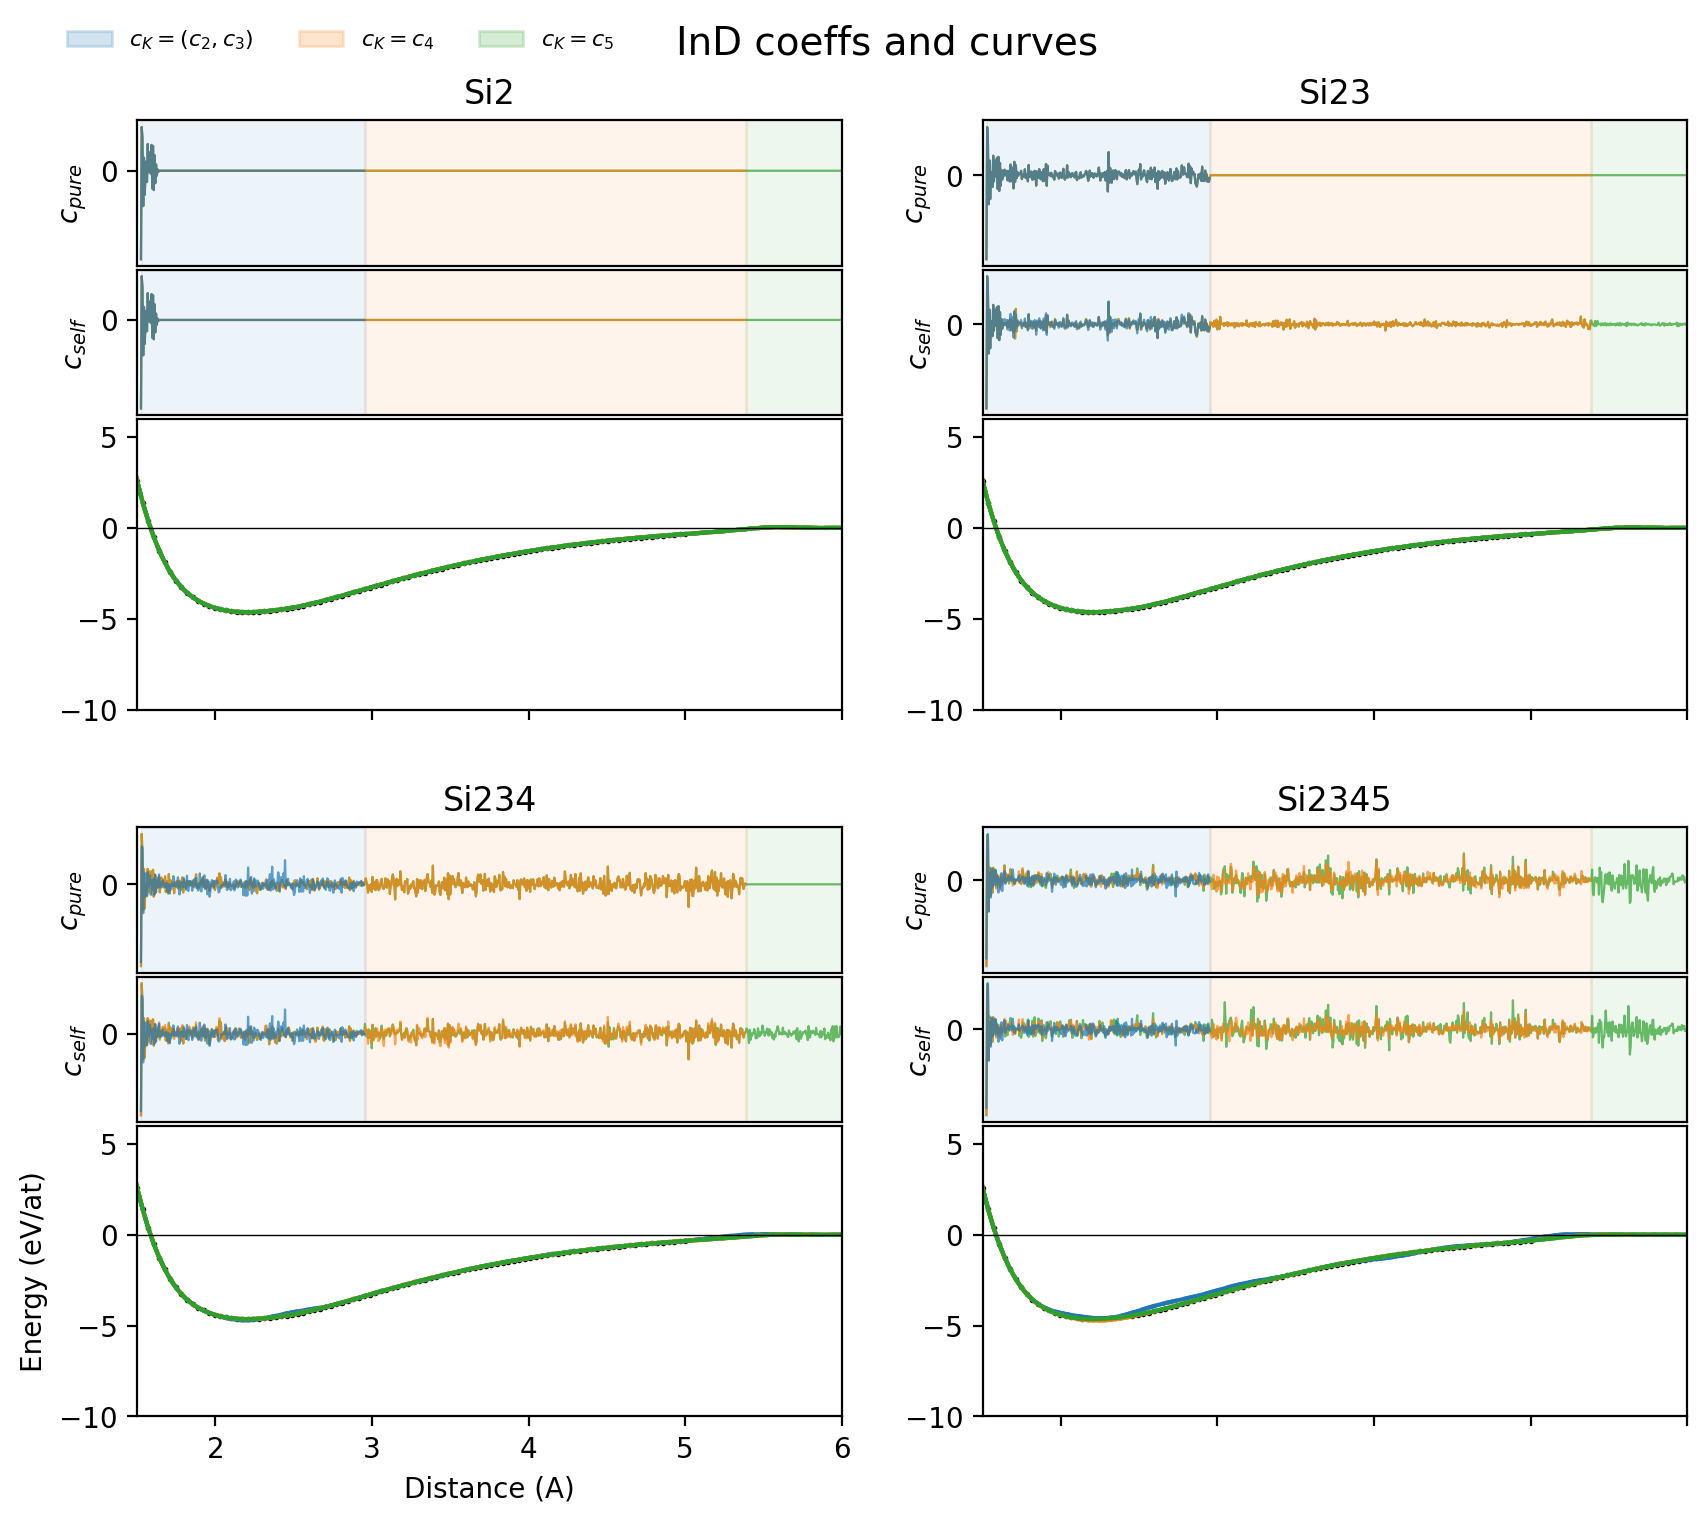

In [19]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

en_si = np.loadtxt('./datasets/Si2_energy.dat').T

# Purified # 
with open('acejulia/Si_purify_inD_trvalsplit_coeffs.dat', 'r') as file:
    lines = file.readlines()
coeffs_pure = {'Si2': [], 'Si23': [], 'Si234': [], 'Si2345': []}
for i, line in enumerate(lines):
    line_list = ast.literal_eval(line)
    if i<3:
        coeffs_pure['Si2'].append(line_list)
    elif i<6:
        coeffs_pure['Si23'].append(line_list)
    elif i<9:
        coeffs_pure['Si234'].append(line_list)
    else:
        coeffs_pure['Si2345'].append(line_list)

# Self-interacting # 
with open('acejulia/Si_selfint_inD_trvalsplit_coeffs.dat', 'r') as file:
    lines = file.readlines()
coeffs = {'Si2': [], 'Si23': [], 'Si234': [], 'Si2345': []}
for i, line in enumerate(lines):
    line_list = ast.literal_eval(line)
    if i<3:
        coeffs['Si2'].append(line_list)
    elif i<6:
        coeffs['Si23'].append(line_list)
    elif i<9:
        coeffs['Si234'].append(line_list)
    else:
        coeffs['Si2345'].append(line_list)

g,gax = plt.subplots(2,2, figsize=(10,8), dpi=200)
g.suptitle(r'InD coeffs and curves', fontsize=14)
g.subplots_adjust(top=0.92, hspace=0.2)
basis_tags = ['24.20', '24.20.16', '24.20.16.12']
ecost = 50.0
dsets = ['Si2', 'Si23', 'Si234', 'Si2345']
dsetlabels = [r'Si$_{2}$', r'Si$_{23}$', r'Si$_{234}$', r'Si$_{2345}$']
Si_pure = {}
Si_selfint = {}

axes_flat = gax.flatten()
for i, dset in enumerate(dsets):
    axes_flat[i].set_title(f'{dsetlabels[i]}')
    axes_flat[i].set_ylim(-10,10)
    axes_flat[i].set_xlim(np.min(en_si[0]),6)
    axes_flat[i].scatter(*en_si, s=1, color='k')
    axes_flat[i].axhline(0, color='k', lw=0.5)
    axes_flat[i].set_title(dsetlabels[i])
    # Split each quadrant into two subplots: top for coefficients, bottom for dimer curve
    inner_gs = axes_flat[i].get_subplotspec().subgridspec(3, 1, height_ratios=[1, 1, 2], hspace=0.02)
    coeff_axp = g.add_subplot(inner_gs[0])
    coeff_axp.set_title(dset)
    coeff_axsi = g.add_subplot(inner_gs[1])
    dimer_ax = g.add_subplot(inner_gs[2], sharex=axes_flat[i])
    # bins, counts = np.loadtxt(f'datasets/pair_distributions/{dset}_histogram.dat').T
    # # Plot histogram as bar
    # dimer_ax.bar(bins, -counts*3/np.max(counts), width=bins[-1]-bins[-2], bottom=0, align='edge', alpha=0.1, color='k', label='Pair histogram')
    # # Add secondary y-axis for the histogram
    # ax_hist = dimer_ax.twinx()
    # # ax_hist.set_ylabel('Pair distribution', fontsize=10)
    # ax_hist.set_ylim(-np.max(counts)*3/np.max(counts), 0)
    # ax_hist.set_yticks([])

    # Hide the original axes_flat[i]
    axes_flat[i].set_visible(False)

        # Plot dimer curves
    for j, basis in enumerate(basis_tags):
        # Load  
        Si_pure[dset+'_'+basis] = np.loadtxt(f'acejulia/{dset}_purify/' + basis + f'/ecost{ecost}/dimercurve.dat').T
        Si_selfint[dset+'_'+basis] = np.loadtxt(f'acejulia/{dset}/' + basis + f'/ecost{ecost}/dimercurve.dat').T
        dimer_ax.plot(*Si_pure[dset+'_'+basis], label=basis+' pure', color='C'+str(j))
        dimer_ax.plot(*Si_selfint[dset+'_'+basis], label=basis+' selfint', color='C'+str(j), linestyle='--')
    dimer_ax.scatter(*en_si, s=1, color='k')
    dimer_ax.axhline(0, color='k', lw=0.5)
    dimer_ax.set_ylim(-10, 6)
    dimer_ax.set_xlim(np.min(en_si[0]), 6)

    # Plot coefficients (pure and self-interacting)
    for j, color in enumerate(['C2', 'C1', 'C0']):
        coeff_axp.plot(coeffs_pure[dset][2-j], color=color, lw=0.8, alpha=0.7)
        coeff_axsi.plot(coeffs[dset][2-j], color=color, lw=0.8, alpha=0.7)
    for axes in [coeff_axp, coeff_axsi]:
        axes.axvspan(0, 297, color='C0', alpha=0.08)
        axes.axvspan(297, 802, color='C1', alpha=0.08)
        axes.axvspan(802, 929, color='C2', alpha=0.08)
        axes.set_xlim(-5,929)

    coeff_axp.set_ylabel(r'$c_{pure}$'); coeff_axsi.set_ylabel(r'$c_{self}$')
    for axes in [coeff_axp, coeff_axsi]:
        axes.set_xticks([]); axes.set_yticks([0])


    
    if i == 2:
        dimer_ax.set_ylabel('Energy (eV/at)', fontsize=10)
        dimer_ax.set_xlabel('Distance (A)', fontsize=10)
    else:
        dimer_ax.set_xticklabels([])
    # if i == 0:
    #     dimer_ax.legend(fontsize=8, loc='upper right')
# axes_flat[1].legend(fontsize=8, loc='upper right')
axes_flat[2].set_ylabel('Energy (eV/at)', fontsize=10)
axes_flat[2].set_xlabel('Distance (A)', fontsize=10)
import matplotlib.patches as mpatches

# Create custom legend patches for the color bar
patch_3body = mpatches.Patch(color='C0', alpha=0.2, label=r'$c_K=(c_2,c_3)$')
patch_4body = mpatches.Patch(color='C1', alpha=0.2, label=r'$c_K=c_4$')
patch_5body = mpatches.Patch(color='C2', alpha=0.2, label=r'$c_K=c_5$')

# Place the color bar legend in a suitable location (e.g., below all subplots)
g.legend(handles=[patch_3body, patch_4body, patch_5body], loc='upper left', ncol=3, bbox_to_anchor=(0.08, 0.99), fontsize=8, frameon=False)
g.savefig('figures/ind_silicon_dimer.png', dpi=300, bbox_inches='tight')

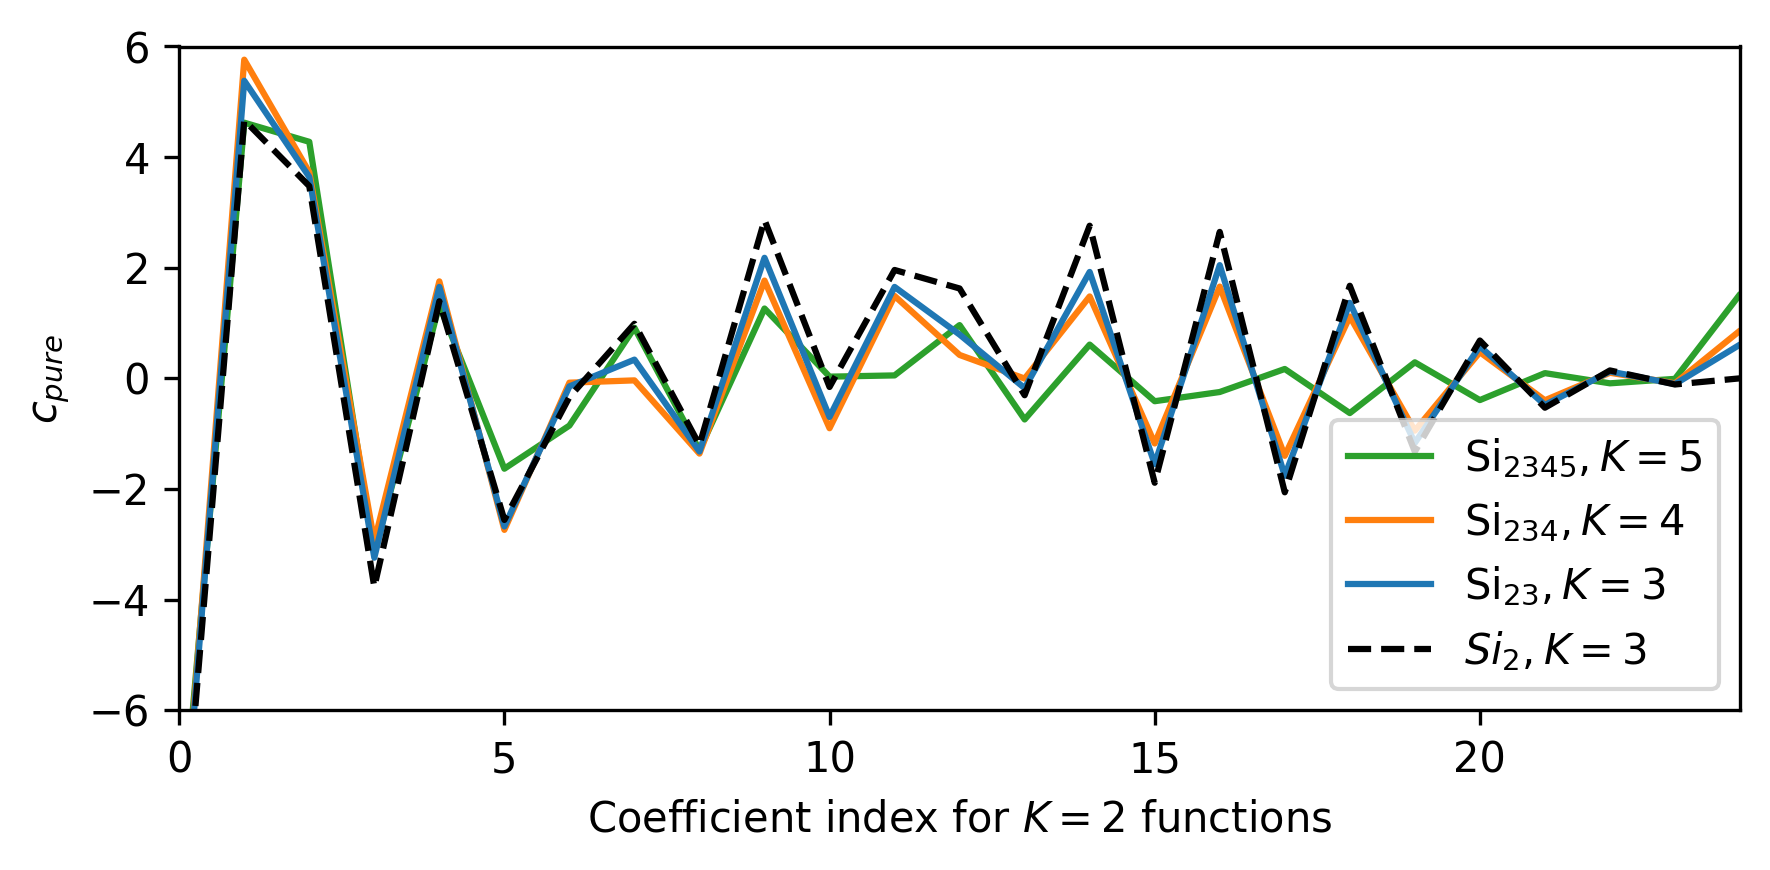

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(6,3), dpi=300)
ax.plot(coeffs_pure["Si2345"][2], color='C2', label=r'Si$_{2345}, K=5$')
ax.plot(coeffs_pure["Si234"][1], color='C1', label=r'Si$_{234}, K=4$')
ax.plot(coeffs_pure["Si23"][0], color='C0', label=r'Si$_{23}, K=3$')
ax.plot(coeffs_pure["Si2"][0], 'k--', label=r'$Si_2, K=3$')
ax.set_xlim(0, 24)
ax.set_ylim(-6,6)
ax.set_ylabel(r'$c_{pure}$')
ax.set_xlabel(r'Coefficient index for $K=2$ functions')
ax.legend(loc='lower right')
plt.tight_layout()
fig.savefig('figures/ind_silicon_k2coeffs.png',dpi=300,bbox_inches='tight')

# Morse relabeling

## Dimer set

In [52]:
def morse_potential(r, a=8.57696795, b=2.00550983, c=1.28317311, d=-8.57696795):
    return a * (1 - np.exp(-b * (r - c)))**2 + d

morse_data = load_gzip('datasets/Tr124_dim_morse.pckl.gzip')
r = []
en = []
for i,atoms in enumerate(morse_data['ase_atoms']):
    r.append(np.linalg.norm(atoms.get_positions()))
    en.append(morse_data['energy'][i])
r = np.array(r)
rsorted = np.sort(r)
rlin = np.linspace(np.min(r), np.max(r), 1000)

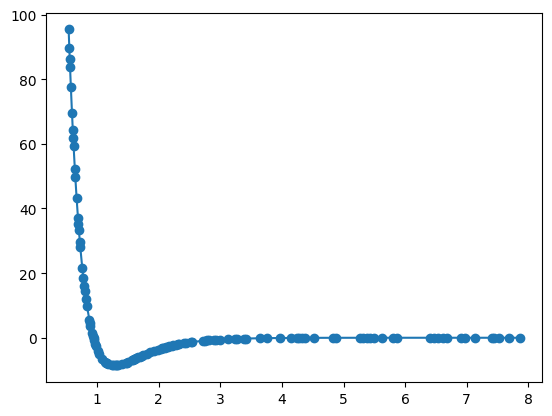

In [53]:
plt.scatter(r, en, label='Morse relabel')
plt.plot(rsorted,morse_potential(rsorted))

## `Tr1k_n`

In [71]:

import scipy.special as sp
## Cutoff functions
def y(r,rcut,delta):
    
    a,b,c = 1.875,-1.25,0.375
    x_arg = 1 - 2*(1 + (r-rcut)/delta)
    return a*x_arg + b*x_arg**3 + c*x_arg**5 

def f(r,rcut,delta):
    return np.piecewise(r, [r<(rcut-delta),(r>(rcut-delta))*(r<rcut), r>rcut], [lambda r: 1,lambda r: 0.5*(1+y(r,rcut,delta)),lambda r:0])

## Radial basis functions
def ChebExpCos(r,k,rcut,lamb):
    # 1st kind Chebyshev poly. with cosine envelope 
    x_chebexp = 1 - 2*((np.exp(-1*lamb*(r/rcut-1))-1)/(np.exp(lamb)-1)) # scaling length
    if k==0:
        return 0.5 * (1 + np.cos(np.pi*r/rcut))
    else: 
        return 0.25*(1 - sp.eval_chebyt(k,x_chebexp))*(1 + np.cos(np.pi*r/rcut))
def ChebExpCos_fcut(r,k,rcut,lamb,delta): # includes shifting and scaling 
    # second f(r,rcut,delta) are values for inner cutoff
    # return ChebExpCos(r,k,rcut,lamb) * f(r,rcut,delta) * (1 - f(r,rcut=0.01,delta=0.005))
    return ChebExpCos(r,k,rcut,lamb) * f(r,rcut,delta)

(0.0, 1.0)

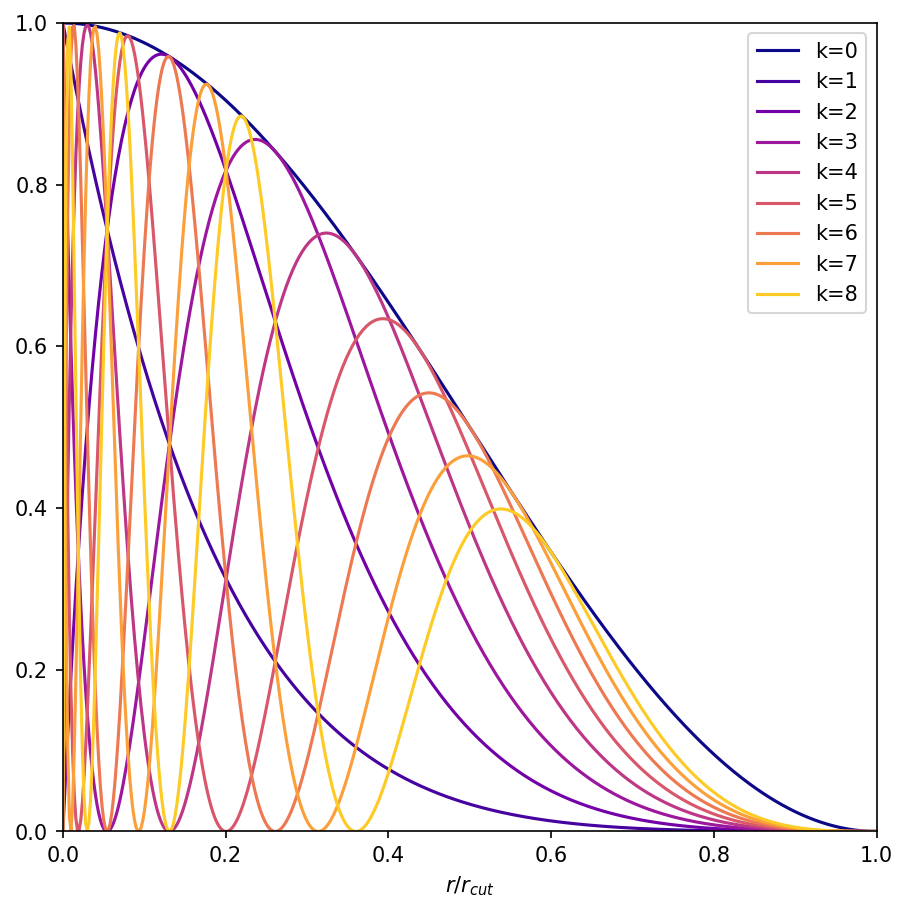

In [80]:
## data
rcut = 5
r = np.linspace(0,rcut,500)
delta = 0.01
kset = np.arange(9)

h,axes = plt .subplots(1,1,sharex=True,figsize=(7,7),dpi=150)
h.subplots_adjust(hspace=0)
for k in kset:
    axes.plot(r/rcut,ChebExpCos_fcut(r,k,rcut=5,lamb=5.25,delta=0.1),label='k=%i'%k,color=cm.plasma(k/len(kset)))
    # axes.plot(r/rcut,ChebExpCos_fcut(r,k,rcut=5,lamb=5.25),label='k=%i'%k,color=cm.plasma(k/len(kset)))
# plt .plot(r,(1+np.cos(np.pi*r/rcut)))
axes.legend()
axes.set_xlabel(r'$r/r_{cut}$')
axes.set_ylim(0,1)
axes.set_xlim(0,1)
# for i,ax in enumerate(axes):
#     ax.set_xlim(0,1)
#     ax.set_ylim(0,1)
#     ax.set_ylabel(r'$g_k(r)$')

In [54]:
# g,gax = plt.subplots(2,2, figsize=(10,8), dpi=200)
# g.suptitle('In-domain Silicon', fontsize=16)
# g.subplots_adjust(top=0.92, hspace=0.2)
# basis_tags = ['24.20', '24.20.16', '24.20.16.12']
# ecost = 50.0
# dsets = ['Si2', 'Si23', 'Si234', 'Si2345']
# dsetlabels = [r'Si$_{2}$', r'Si$_{23}$', r'Si$_{234}$', r'Si$_{2345}$']
# Si_pure = {}
# Si_selfint = {}

# axes_flat = gax.flatten()
# for i, dset in enumerate(dsets):
#     axes_flat[i].set_title(dsetlabels[i])
#     axes_flat[i].set_ylim(-10,10)
#     axes_flat[i].set_xlim(np.min(en_si[0]),6)
#     axes_flat[i].scatter(*en_si, s=1, color='k')
#     axes_flat[i].axhline(0, color='k', lw=0.5)
#     for j, basis in enumerate(basis_tags):
#         # Load
#         Si_pure[dset+'_'+basis] = np.loadtxt(f'acejulia/{dset}_purify/' + basis + f'/ecost{ecost}/dimercurve.dat').T
#         Si_selfint[dset+'_'+basis] = np.loadtxt(f'acejulia/{dset}/' + basis + f'/ecost{ecost}/dimercurve.dat').T
#         # Plot
#         axes_flat[i].plot(*Si_pure[dset+'_'+basis], label=basis+' pure', color='C'+str(j))
#         axes_flat[i].plot(*Si_selfint[dset+'_'+basis], label=basis+' selfint', color='C'+str(j), linestyle='--')
# axes_flat[0].legend(fontsize=10)
# g.savefig('figures/ind_silicon_dimer.png', dpi=300, bbox_inches='tight')

In [64]:
1.286958464 / 0.529177

2.432

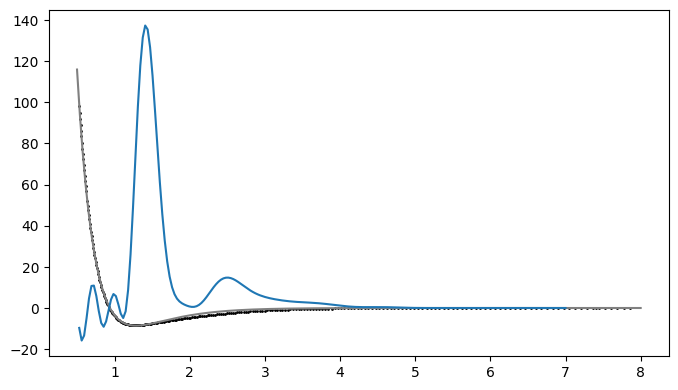

In [62]:
r = np.linspace(0.5,8,200)
en_qe = np.loadtxt('../codefiles_Convergence-of-body-orders-in-linear-ace/datafiles/es01_dimer250.dat').T
en_qe[0] *= 0.529177 # bohr to Angstrom
en_qe[1] -= -18.03977639 * 2 # remove e1b
en_qe[1] *= 13.605703976 # Rydberg to eV
pot_2420 = np.loadtxt('acejulia/Tr1k_n_morse/24.20/ecost50.0/dimercurve_LSQR.dat').T

f,ax = plt.subplots(1,1, figsize=(8,4.5), dpi=100)
ax.scatter(*en_qe, s=1, color='k', label='DFT')
ax.plot(r, morse_potential(r), label='Morse potential', color='gray')
ax.plot(*pot_2420, label='24.20 ACE', color='C0')
# ax.set_ylim(-10,6)